# numpy리뷰(수업 후 개인복습)

### list와 array의 차이

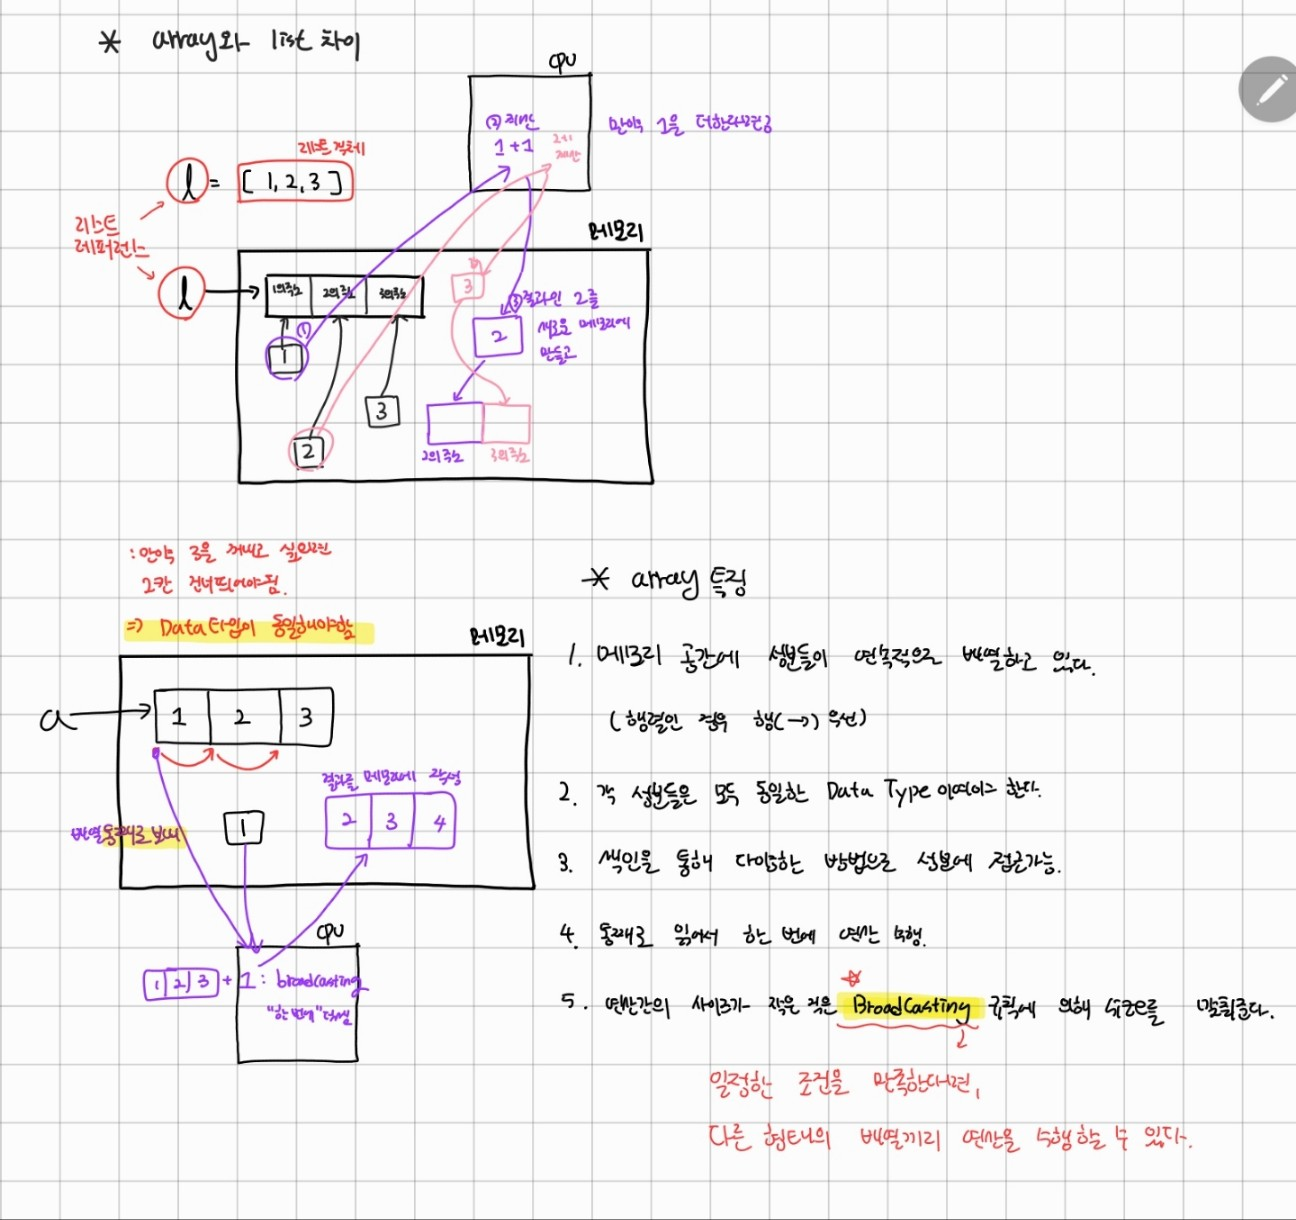

### array특징
  
1. 메모리 공간에 성분들을 연속으로 배열하고 있다. 행렬인 경우 행우선으로 연속하여 배열된다.
2. 각 성분들은 모두 동일한 데이터 타입이여야 한다.(몇 칸 이동하는지 알아야 한다.)
3. 색인을 통해 다양한 방법으로 그 성분들에 접근할 수 있다.   
4. 통째로 읽어서 한 버네 연산을 수행한다. 
5. 연산간에 사이즈가 작은 것은 broadcasting 규칙에 의해 사이즈를 맞춰준다.

In [14]:
import numpy as np # numpy 패키지 로드하여 np로 사용
a = np.array([3,6,2]) #배열
l=[3,6,2] #리스트

print(a, l)#array는 ,가 없고 list는 ,가 있다.

[3 6 2] [3, 6, 2]


### array의 색인

- 점색인(point indexing) : array의 하나의 성분을 가져오는 것  
ex) a[ [1] ] 
- 불연속색인(fancy indexin) : 점색인을 여러번하는 것  
ex) a[ [2,0] ] 
- 연속색인(slicing) : 특정방향으로 특정 간격에서 연속해서 가져오는 것  

### array에 대한 함수들

1. type() : 데이터타입을 확인하기 위한 함수
2. len(): 문자열 길이 반환
3. np.array() : 기존 list를 array로 변환해줌

In [22]:
l = [1,2,3] #리스트
a = np.array([3,6,2]) #만들긴 했는데 아직 결과는 없음
a[1] #list와 똑같은 표기더라도 array는 순서에 의한 접근이 가능하다, 색인 연산자

#type은 데이터타입을 확인하는 함수
type(a)

#np.array() : 기존 list를 array로 변환해줌
a=np.array(l)
print(a)

[1 2 3]


### 연속색인

array.[start:ed:(-)step]  
- start는 안 쓰면 기본값 0
- end도 안 쓰면 기본값이 len(array)  
    그러나 end는 indexing되지 않는다.  
    
- 부호 -와 step은 안 써도 상관없다.(옵션)  
- step 얼마나 건너 뛸거냐를 나타냄. 기본값은 1  

In [23]:
a[0: ] #전부 가지고 오라는 의미, 0은 디폴트

array([1, 2, 3])

In [24]:
a[0:len(a)]
#a[0:3] 이라는 의미
#근데 0,1,2번째만 있지 3번째의 index는 없는데 어떻게 가능할까?
#-> end에 해당하는 값은 indexing되지 않기 때문.

array([1, 2, 3])

In [27]:
a[:2]
#0번째, 1번째만 포함됨
#도착지점이 2번째 index지만 end에 해당하는 index는 빼니까

array([1, 2])

In [28]:
a[-3:2] #-의 의미는? "끝에서"첫 번째, "끝에서" 두 번째 의미

array([1, 2])

In [31]:
a[::2] #처음부터 끝까지 2칸 건너띄어서 1,2,3 인데 1,3만 출력  
a[::-2]#방향을 반대로 돌려서 뒤에서 두칸 띄어 1,2,3중에 3,1출력

array([3, 1])

- 먼저 3과 2만 가져오고 싶다.

In [32]:
a[[True,False,True]] #0번째,2번째는 가지고 오고, 1번째는 가지고 오지 않는다.  

array([1, 3])

In [33]:
#[[True, False]] #이것은 문제가 생긴다. 2번째 인덱스를 정해주지 않았기 때문에 "순서문제"

try:
    a[[True,False]]
except Exception as e:
    print(e)
    

boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 2


In [34]:
a[[True,False,True]][::-1] #순서를 반대로 돌려

array([3, 1])

### 배열과 배열의 연산

1. 모양(shape)이 같으면 연산이 이루어진다. 
2. 모양이 다르면 broadcasting 규칙에 의해 연산이 이루어진다. 
3. broadcasting 규칙에 위배되면 연산이 발생하지 않는다.
(모양의 마지막을 본다.)

In [35]:
#a + [1,1,1] #list처럼 더하면 메모리를 더 많이 쓰는 것
a + 1 

array([2, 3, 4])

In [40]:
#배열의 성분별 덧셈

r = np.array([7,8,9])
print(r)
print(a)

a+r #성분별 덧셈이 이루어진다. 통째로 ram에 올려서 cpu에서 한 번에 덧셈함
print(a+r)

[7 8 9]
[1 2 3]
[ 8 10 12]


In [44]:
#우리가 원한바가 아닌 리스트의 덧셈
l = [4,5,6]
s = [7,8,9]
l+s
print(l+s)

#만약 우리가 원한대로 덧셈해주려면 for문을 이용
[i+j for i,j in zip(l,s)]

[4, 5, 6, 7, 8, 9]


[11, 13, 15]

In [47]:
#인덱스의 개수가 맞지 않는 덧셈을 할 경우?
y=[4,5,2,3]
a #a는 1,2,3임


try:
    a+y#<-인덱스의 개수가 y는 4개, a는 3개라서 맞지 않음 즉, 오류
except Exception as e:
    print(e)




operands could not be broadcast together with shapes (3,) (4,) 


### shape함수

- 파이썬 Numpy행렬(Matrix)함수 : Shape
- 파이썬 Numpy행렬(Matrix)함수 : Reshape

1. shape란?  배열의 모양(차원) 정보를 반환한다. 그러나 모양 자체를 변경하진 않는다.  
- shape의 목적: 배열의 차원이나 차원의 크기를 확인하기 위해 사용됨.  
  
  
2. reshape란? 배열의 차원을 수정한다.
- 배열의 데이터를 복사해서 새로운 형태의 배열을 생성함  
- reshape(x축,y축,z축)

※주의할 점:  
array값은 reshape하고자 하는 행렬의 매트릭스 수와 같아야한다.   
예를 들어 3,4행렬로 reshape한다면 입력 값은 12개가 1차원으로 있어야 한다.  

In [53]:
y=np.array([2,5,2,7,8,9])
#y.shape(y) #배열의 모양을 반환함.
y.reshape((2,3)) #모양 변경, 2개의 행과 3개의 열을 가진 Matrix로 바꿔줌


array([[2, 5, 2],
       [7, 8, 9]])

In [54]:
y.reshape((2,3))+a #a는 1,2,3임
#array의 특징 덕분에 list처럼 말고 배열의 성분끼리 더할 수 있다

array([[ 3,  7,  5],
       [ 8, 10, 12]])

In [55]:
(y.reshape((2,3))+a).reshape(-1)

array([ 3,  7,  5,  8, 10, 12])

In [58]:
y.reshape((2,1))
z.reshape((2,1))

#y+z -> 오류 why? 모양의 마지막이 다르니까
y.reshape((3,2)) + z #맨 끝자리가 2로 같다.

#y.reshape((2,3)) + z #이 문장은 오류남
#y.reshape((2,3)) + z.reshape((2,1)) #그러나 얘는 끝자리가 같음.



ValueError: cannot reshape array of size 6 into shape (2,1)

#### 브로드캐스팅 규칙
두 배열 a,b의 모양이 a.shape = (n,m,s,t), b.shape = (x,y,z)와 같을 때   
a+b의 연산이 이뤄지기 위해서는:  
1. 각 배열의 마지막 모양의 값인 t와 z에 대해 
 - t == z 이거나,  
 - t 또는 z중 어느 하나가 1이어야 한다.
 
 2. 1이 만족되면 다음 모양인 s,y에 대해 
 - s == y 이거나,  
 - s 또는 y중 어느 하나가 1이어야 한다.
 
 3. 2가 만족되면 다음 모양은 m,x에 대해
  - m == x이건,  
  - m 또는 y중 어느 하나가 1이여야 한다.
 
 4. a의 모양 n이 남은 상태에서 b의 모양이 더 이상 없을 때
  - b는 a만큼 반복된다.

### 연산의 방향

### 정렬하기

In [59]:
r = np.array([3, 5.6 , 7.2 , 1.2 , 3.4])
print(r)

r.sort() #r자체를 정렬하여 r을 바꾼다.
np.sort(r) #r을 정렬한 새로운 array를 리턴

[3.  5.6 7.2 1.2 3.4]


array([1.2, 3. , 3.4, 5.6, 7.2])

- 반별로 과목별로 top5 성적의 학생 id를 구하라

### np.함수

### 중요한 함수